In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 설정
import matplotlib as mpl
mpl.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="/Users/dofany/dofany_study/python/analysis/data/ImcreSoojin OTF.otf").get_name()
plt.rc("font", family=font_name)

import seaborn as sns

plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

# 서울시 공공 자전거 대여 분석

## 데이터 준비

In [14]:
bike = pd.read_csv('data/SeoulBikeData.csv')
bike.head(10)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### 시간대별로 평균 몇 대가 대여 되었을까?

In [15]:
bike.groupby("Hour")["Rented Bike Count"].mean()

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

### 위의 결과를 시각화

Text(16, 150, '퇴근')

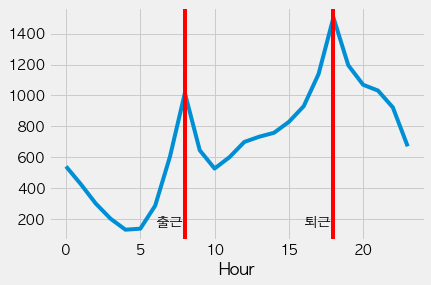

In [22]:
bike.groupby("Hour")["Rented Bike Count"].mean().plot()

plt.axvline(x=8, color='r')
plt.axvline(x=18, color='r')
plt.text(6, 150, "출근")
plt.text(16, 150, "퇴근")

### 2016년 1월 1일은 금요일이었다. Date변수에서 요일을 뽑아서 파생변수(weekdays) 만들기

In [25]:
bike['weekdays'] = ((pd.to_datetime(bike['Date']) - pd.to_datetime('2016-01-01')).dt.days%7)
bike['weekdays'] = bike['weekdays'].map({0 : 'FRI',
                                        1 : 'SAT',
                                        2 : 'SUN',
                                        3 : 'MON',
                                        4 : 'TUE',
                                        5 : 'WED',
                                        6 : 'THU'})
bike

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,THU
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,THU
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,THU
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,THU
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,THU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,FRI
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,FRI
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,FRI
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,FRI


### 요일별로 평균 몇 대가 대여되었을까?

In [26]:
bike.groupby('weekdays')["Rented Bike Count"].mean()

weekdays
FRI    734.449346
MON    719.635833
SAT    730.348558
SUN    615.968364
THU    743.803686
TUE    678.362421
WED    714.521226
Name: Rented Bike Count, dtype: float64

### 위의 결과를 막대 그래프로 시각화

<AxesSubplot:xlabel='weekdays', ylabel='Rented Bike Count'>

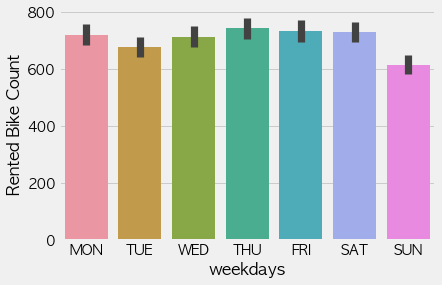

In [29]:
sns.barplot(x='weekdays',y="Rented Bike Count", data=bike,
           order=["MON","TUE","WED","THU","FRI","SAT","SUN"])


### 요일 별 시간대별로 그래프로 시각화

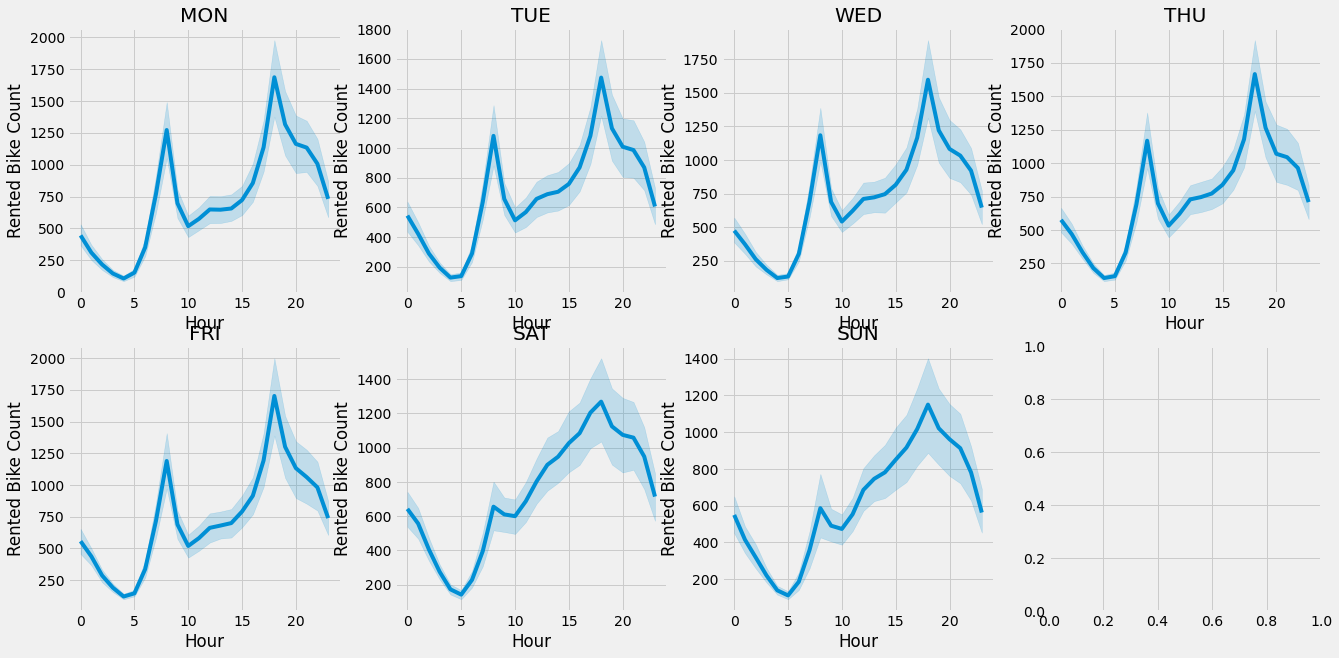

In [41]:
f, ax = plt.subplots(2, 4, figsize=(20, 10))

weekdays_list = ["MON","TUE","WED","THU","FRI","SAT","SUN"]

for i in range(7):
    sns.lineplot("Hour", "Rented Bike Count",data=bike.loc[bike["weekdays"]==weekdays_list[i]],
                ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title(weekdays_list[i])